In [ ]:
# Forecasting with Deep-XF

In [ ]:
# install deep-xf library
!pip install deep-xf

     |████████████████████████████████| 9.5 MB 6.6 MB/s 
     |████████████████████████████████| 208 kB 42.2 MB/s 
     |████████████████████████████████| 23.2 MB 44.4 MB/s 
     |████████████████████████████████| 356 kB 52.8 MB/s 
     |████████████████████████████████| 554 kB 70.5 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491652 sha256=f54d42a77944ed2db8aa68232ffd32431d3073de5d045b1d216a4a8883a260a2
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43819 sha256=acaa0149fc4615d55ad72d5d79a2fee3f9bcb4439382756be4cd5086d02fa15f
  Stored in directory: /root/.cache/pip/wheels/1f/c1/4c/8de278f816259b4f67e2356c0bda260a593375661e400bf31f
Successfully built shap gatspy
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully

In [ ]:
# import libraries
from deep_xf.main import *
from deep_xf.dpp import *
from deep_xf.forecast_ml_extension import *
from deep_xf.utility import *

Imported DeepXF version:0.0.5. Example call by using:

******************   SET FORECAST MODEL/BASE CONFIGURATIONS   ********************

# select algorithms, scaler, etc.
select_model, select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='rnn', select_user_path='./forecast_folder_path/', select_scaler='minmax', forecast_window=1)

----------------------------------------------------------------------------------

# set variables
ts, fc = Forecast.set_variable(ts='Datetime', fc='PJME_MW')

# get variables
model_df, orig_df = Helper.get_variable(df, ts, fc)

----------------------------------------------------------------------------------

# set hyperparameters
hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = Forecast.hyperparameter_config(hidden_dim=64,layer_dim = 3, batch_size=64, dropout = 0.2, n_epochs = 30, learning_rate = 1e-3, weight_decay = 1e-6)

-----------------------------------------------------------

We use the Alibaba cloud virtual machine’s data containing the following attributes:- 
- CPU utilization percentage (cpu_util_percent), 
- memory utilization percentage (mem_util_percent),
- normalized incoming network traffic (net_in), 
- normalized outgoing network traffic (net_out), 
- disk I/O percentage (disk_io_percent).

In [ ]:
from google.colab import files
data_to_load = files.upload()  # upload virtual machine's data from here - https://github.com/ajayarunachalam/Deep_XF/blob/main/data/m1.csv
                               # or alternative read data directly from github into the colab notebook

Saving m1.csv to m1.csv


In [ ]:
# Peek into alibaba cloud virtual machine's data
import io
df = pd.read_csv(io.BytesIO(data_to_load['m1.csv']))

In [ ]:
df.shape

(46368, 6)

In [ ]:
df.head(2)

timestamp  cpu_util_percent  ...  net_out  disk_io_percent
0  2011-05-01 12:00:10                13  ...    23.09                1
1  2011-05-01 12:00:20                10  ...    23.09                1

[2 rows x 6 columns]

In [ ]:
df.tail(2)

timestamp  cpu_util_percent  ...  net_out  disk_io_percent
46366  2011-05-07 16:38:00                35  ...    29.47                8
46367  2011-05-07 16:38:10                38  ...    29.47                8

[2 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46368 entries, 0 to 46367
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         46368 non-null  object 
 1   cpu_util_percent  46368 non-null  int64  
 2   mem_util_percent  46368 non-null  int64  
 3   net_in            46368 non-null  float64
 4   net_out           46368 non-null  float64
 5   disk_io_percent   46368 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.1+ MB


In [ ]:
# check missing values
print("Missing information for whole dataset")
print("Missing by row", df.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row timestamp           0
cpu_util_percent    0
mem_util_percent    0
net_in              0
net_out             0
disk_io_percent     0
dtype: int64
Missing by col 0        0
1        0
2        0
3        0
4        0
        ..
46363    0
46364    0
46365    0
46366    0
46367    0
Length: 46368, dtype: int64


In [ ]:
# set forecasting model configurations - Currently provided tested deep neural networks include ['rnn', 'lstm', 'gru', 'birnn', 'bigru']
select_model, select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='lstm', select_user_path='./FORECAST_MY/', select_scaler='minmax', forecast_window=1)

select_model = lstm
select_user_path = ./FORECAST_MY/
select_scaler = minmax
forecast_window = 1


In [ ]:
# set model hyparameters
hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = \
Forecast.hyperparameter_config(hidden_dim=64, layer_dim = 3, batch_size=64, dropout = 0.2, \
                               n_epochs = 30, learning_rate = 1e-3, weight_decay = 1e-6)

hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 30
learning_rate = 0.001
weight_decay = 1e-06


In [ ]:
# set variables
ts, fc = Forecast.set_variable(ts='timestamp', fc='cpu_util_percent')

ts = timestamp
fc = cpu_util_percent


In [ ]:
# get variables
model_df, orig_df = Helper.get_variable(df, ts, fc)

In [ ]:
model_df.head(1)

value  mem_util_percent  net_in  net_out  disk_io_percent
timestamp                                                                     
2011-05-01 12:00:10     13                84   32.46    23.09                1

In [ ]:
orig_df.head(1)

timestamp  cpu_util_percent  ...  net_out  disk_io_percent
0  2011-05-01 12:00:10                13  ...    23.09                1

[1 rows x 6 columns]

In [ ]:
ExploratoryDataAnalysis.plot_dataset(df=model_df,fc=fc, title='CPU UTILIZATION OF ALIBABA CLOUD VIRTUAL MACHINES')

In [ ]:
df_full_features = Features.generate_date_time_features_hour(model_df, ['hour','month','day','day_of_week','week_of_year'])

In [ ]:
# generating cyclic features
df_full_features = Features.generate_cyclic_features(df_full_features, 'hour', 24, 0)
df_full_features = Features.generate_cyclic_features(df_full_features, 'day_of_week', 7, 0)
df_full_features = Features.generate_cyclic_features(df_full_features, 'month', 12, 1)
df_full_features = Features.generate_cyclic_features(df_full_features, 'week_of_year', 52, 0)

In [ ]:
df_full_features = Features.generate_other_related_features(df=df_full_features)

In [ ]:
df_full_features.head(2)

value  mem_util_percent  ...  cos_week_of_year  is_holiday
timestamp                                     ...                              
2011-05-01 12:00:10     13                84  ...         -0.464723           0
2011-05-01 12:00:20     10                84  ...         -0.464723           0

[2 rows x 15 columns]

In [ ]:
df_full_features.columns

Index(['value', 'mem_util_percent', 'net_in', 'net_out', 'disk_io_percent',
       'day', 'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'sin_month', 'cos_month', 'sin_week_of_year', 'cos_week_of_year',
       'is_holiday'],
      dtype='object')

In [ ]:
df_full_features_ = df_full_features[['value', 'day', 'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'sin_month', 'cos_month', 'sin_week_of_year', 'cos_week_of_year',
       'is_holiday']]

Train-Val-Test Split
Predictors: Train-(27820, 10), Val-(9274, 10), Test-(9274, 10)
Response: Train-(27820, 1), Val-(9274, 1), Test-(9274, 1)
cpu is available.
[1/30] Training loss: 0.0227	 Validation loss: 0.0563
[2/30] Training loss: 0.0191	 Validation loss: 0.0513
[3/30] Training loss: 0.0191	 Validation loss: 0.0317
[4/30] Training loss: 0.0190	 Validation loss: 0.0179
[5/30] Training loss: 0.0174	 Validation loss: 0.0143
[6/30] Training loss: 0.0163	 Validation loss: 0.0141
[7/30] Training loss: 0.0162	 Validation loss: 0.0140
[8/30] Training loss: 0.0163	 Validation loss: 0.0140
[9/30] Training loss: 0.0162	 Validation loss: 0.0139
[10/30] Training loss: 0.0162	 Validation loss: 0.0138
[11/30] Training loss: 0.0162	 Validation loss: 0.0139
[12/30] Training loss: 0.0161	 Validation loss: 0.0138
[13/30] Training loss: 0.0160	 Validation loss: 0.0138
[14/30] Training loss: 0.0160	 Validation loss: 0.0138
[15/30] Training loss: 0.0159	 Validation loss: 0.0137
[16/30] Training loss: 0

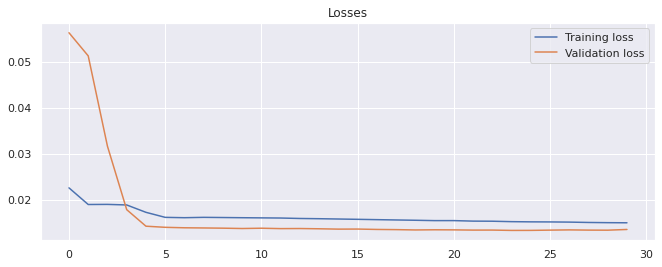

Forecast testset predictions:                          value  prediction
timestamp                                 
2011-05-06 14:48:50  36.000000   39.167713
2011-05-06 14:49:00  35.000000   39.167713
2011-05-06 14:49:10  36.000000   39.167713
2011-05-06 14:49:20  34.000000   39.167713
2011-05-06 14:49:30  35.000000   39.167713
...                        ...         ...
2011-05-07 16:37:30  50.999996   48.817535
2011-05-07 16:37:40  54.999996   48.817535
2011-05-07 16:37:50  36.000000   48.817535
2011-05-07 16:38:00  35.000000   48.817535
2011-05-07 16:38:10  38.000000   48.817535

[9274 rows x 2 columns]
Mean Absolute Error (MAE):        7.316722
Root Mean Squared Error (RMSE):    8.779365310147622
Forecast bias:   		   -4.248650039761699
Mean Absolute Percentage Error (MAPE):    24.342838287353516
R^2 Score:                  0.4809379290155811
Explained Variance Score:   0.6024991273880005
Root Mean Squared Relative Error (RMSRE):  0.3062057570204039
Symmetric Mean Absolute Percenta

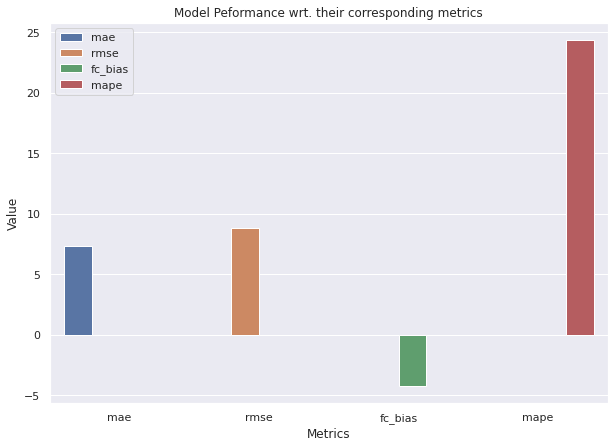

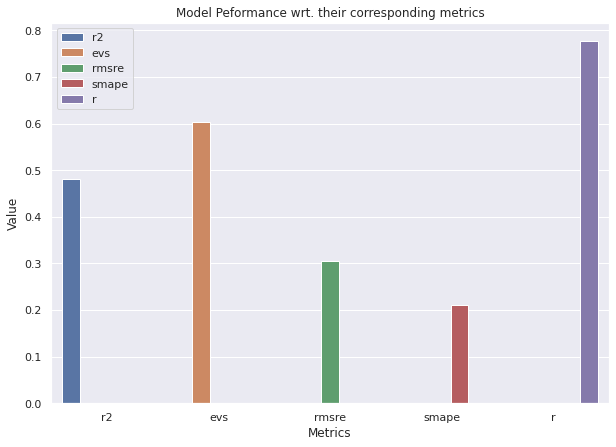

In [ ]:
# train forecasting model
opt, scaler = Forecast.train(df=df_full_features_, target_col='value', split_ratio=0.2, select_model=select_model, \
             select_scaler=select_scaler, forecast_window=forecast_window, batch_size=batch_size,\
            hidden_dim=hidden_dim, layer_dim=layer_dim,dropout=dropout, \
             n_epochs=n_epochs, learning_rate=learning_rate, weight_decay=weight_decay)

Forecast period dataframe: DatetimeIndex(['2011-05-07 16:38:20', '2011-05-07 16:38:30',
               '2011-05-07 16:38:40', '2011-05-07 16:38:50',
               '2011-05-07 16:39:00', '2011-05-07 16:39:10',
               '2011-05-07 16:39:20', '2011-05-07 16:39:30',
               '2011-05-07 16:39:40', '2011-05-07 16:39:50',
               ...
               '2011-05-07 19:23:20', '2011-05-07 19:23:30',
               '2011-05-07 19:23:40', '2011-05-07 19:23:50',
               '2011-05-07 19:24:00', '2011-05-07 19:24:10',
               '2011-05-07 19:24:20', '2011-05-07 19:24:30',
               '2011-05-07 19:24:40', '2011-05-07 19:24:50'],
              dtype='datetime64[ns]', name='timestamp', length=1000, freq=None)
Tensor size: 1000
Forecast period predictions:                          value
timestamp                     
2011-05-07 16:38:20  24.814653
2011-05-07 16:38:30  24.814653
2011-05-07 16:38:40  24.814653
2011-05-07 16:38:50  24.814653
2011-05-07 16:39:00  24.814653

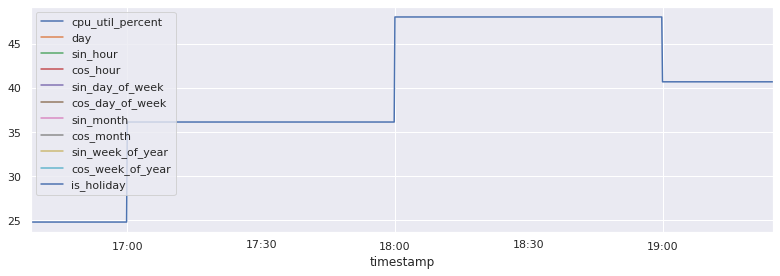

In [ ]:
#@title
forecasted_data, ff_full_features, ff_full_features_ = Forecast.forecast(df_full_features_, ts, fc, opt, scaler, period=1000, fq='10s', select_scaler=select_scaler,)